# Analysis of Gun Violence in the US:

This notebook is an analysis of current gun violence data in the United States.

## 1. Mass Shootings

We define mass shootings in this context as incidents that result in four or more people being shot, but not necessarily killed. This is not inclusive of the shooter themselves. Data in this study is taken from 2015-2023. Population counts used are from the 2010 Census and the 2020 Census.

- Mass Shooting Victim Data: https://www.gunviolencearchive.org/reports
- State Population Data: https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

### a. Data Cleaning and Setup

In [1]:
# Import of libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load in data files
ms_2015 = pd.read_csv('MS_2015.csv', delimiter=',')
ms_2016 = pd.read_csv('MS_2016.csv', delimiter=',')
ms_2017 = pd.read_csv('MS_2017.csv', delimiter=',')
ms_2018 = pd.read_csv('MS_2018.csv', delimiter=',')
ms_2019 = pd.read_csv('MS_2019.csv', delimiter=',')
ms_2020 = pd.read_csv('MS_2020.csv', delimiter=',')
ms_2021 = pd.read_csv('MS_2021.csv', delimiter=',')
ms_2022 = pd.read_csv('MS_2022.csv', delimiter=',')
ms_2023 = pd.read_csv('MS_2023.csv', delimiter=',')

# Concatenate all the data into one data frame:
ms_data = pd.concat([ms_2015, ms_2016, ms_2017, ms_2018, ms_2019,ms_2020, ms_2021, ms_2022, ms_2023], ignore_index=True)

In [5]:
# Data Cleaning and Definition: 

# General Info
ms_data['Incident Date'] = pd.to_datetime(ms_data['Incident Date'], format='%B %d, %Y')
ms_year = ms_data['Incident Date'].dt.year

ms_state = ms_data['State']
ms_deaths = ms_data['Victims Killed']
ms_injured = ms_data['Victims Injured']
# Total victims
ms_total_vics = ms_deaths + ms_injured
# Suspect data
ms_susdeaths = ms_data['Suspects Killed']
ms_susinjured = ms_data['Suspects Injured']
ms_susarrested = ms_data['Suspects Arrested']

# We can define these for individual years too!

In [7]:
# Need to read in the population data per state from the 2020 census
# The state names are also in alphabetical order, so are those for each year's incidents

# Load in data file
census_2020 = pd.read_csv('Census2020.csv', delimiter=',')

# Drop the first 14 rows, removing general regions
census_2020 = census_2020.iloc[14:].reset_index(drop=True)

# Remove DC and Puerto Rico
census_2020 = census_2020.drop(index=[8, 51]).reset_index(drop=True)

# Population of each state in 2020
state_pops = census_2020['ESTIMATESBASE2020']

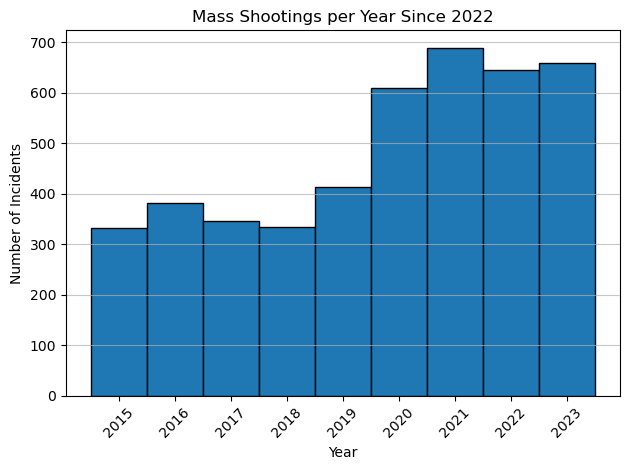

In [9]:
# Plot 1: Mass-Shootings per year

#plt.figure(figsize=(10, 6))
plt.hist(ms_year, bins=range(ms_year.min(), ms_year.max() + 2), edgecolor='black', align='left')
plt.title("Mass Shootings per Year Since 2022")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.xticks(range(ms_year.min(), ms_year.max() + 1), rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
# Plot 2: Incidents per state

# We get a list of all state names
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

us_state_abbreviations = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Need to count incidents per state:
incidents_by_state = [] # In alphabetical order, to be plotted with above name list
for name in us_states: # For each state name
    count = 0
    for incident in ms_state: # Count the amount of times the name occurs
        if incident == name:
            count+=1
        else:
            pass
    incidents_by_state.append(count) # Append that count to the incidents list
    

In [13]:
print(incidents_by_state)
print(len(incidents_by_state))
print(sum(incidents_by_state))

[112, 4, 53, 52, 378, 75, 28, 18, 251, 167, 1, 3, 443, 91, 19, 25, 52, 204, 4, 139, 37, 131, 60, 99, 131, 4, 17, 32, 2, 99, 24, 192, 145, 1, 179, 35, 22, 215, 3, 111, 3, 133, 318, 6, 1, 96, 58, 5, 60, 1]
50
4339


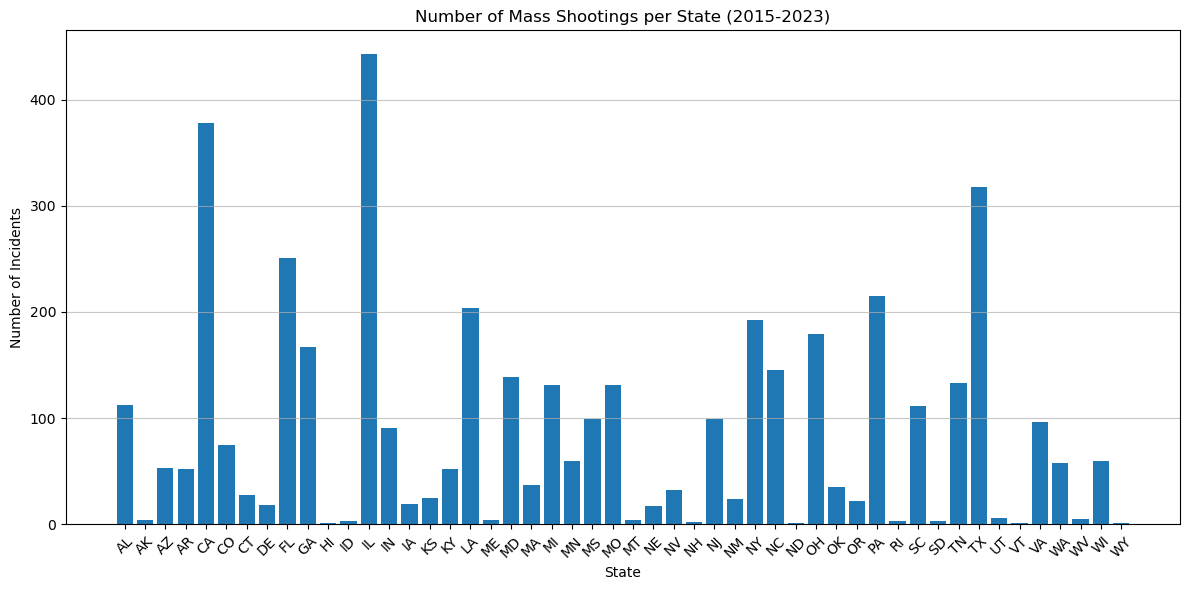

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(us_state_abbreviations, incidents_by_state)
plt.title("Number of Mass Shootings per State (2015-2023)")
plt.xlabel("State")
plt.ylabel("Number of Incidents")
plt.xticks(us_state_abbreviations, rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

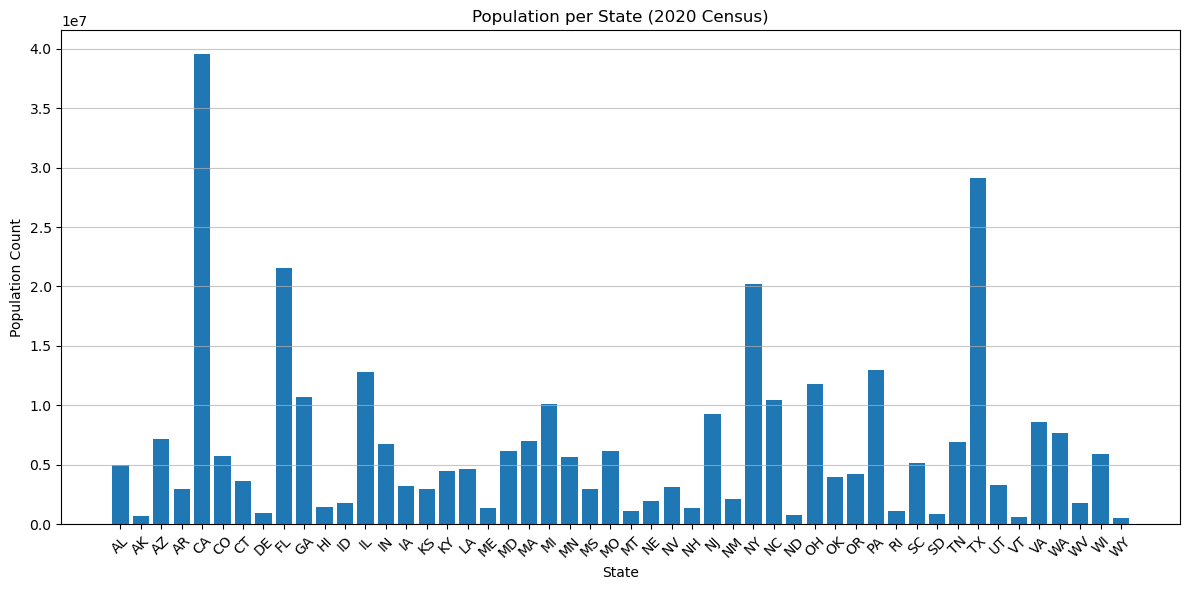

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(us_state_abbreviations, state_pops)
plt.title("Population per State (2020 Census)")
plt.xlabel("State")
plt.ylabel("Population Count")
plt.xticks(us_state_abbreviations, rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

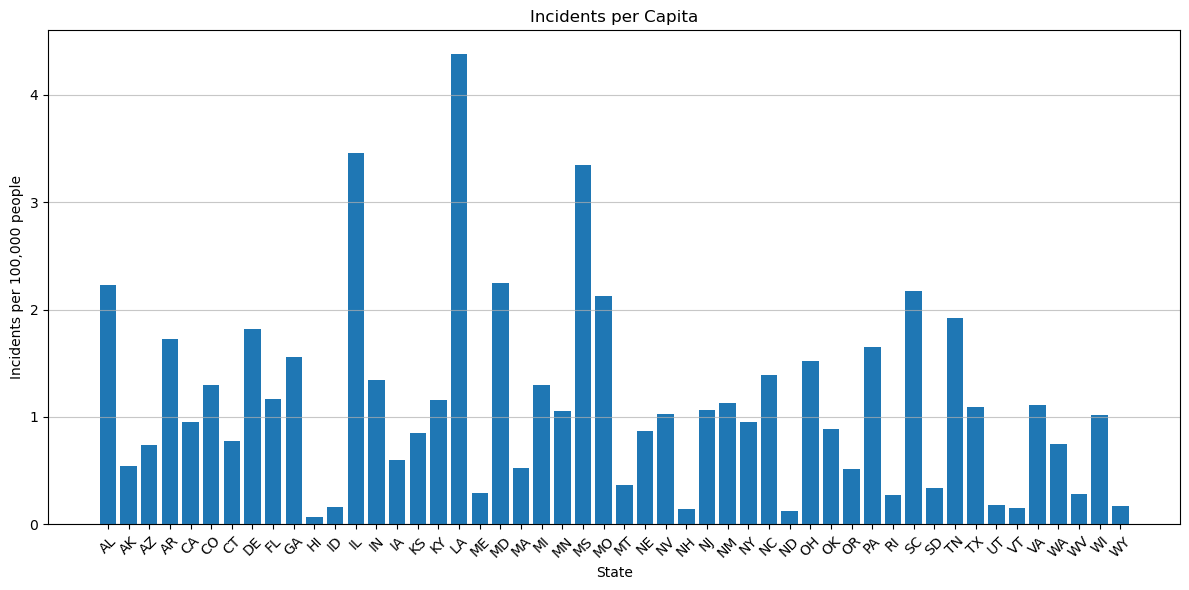

In [19]:
# Plot 3: Number of mass shootings per capita in 2024
incidents_per_capita = (incidents_by_state / state_pops) * 100000

plt.figure(figsize=(12, 6))
plt.bar(us_state_abbreviations, incidents_per_capita)
plt.title("Incidents per Capita")
plt.xlabel("State")
plt.ylabel("Incidents per 100,000 people")
plt.xticks(us_state_abbreviations, rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

Season
Summer    1486
Spring    1203
Fall       957
Winter     763
Name: count, dtype: int64
4409


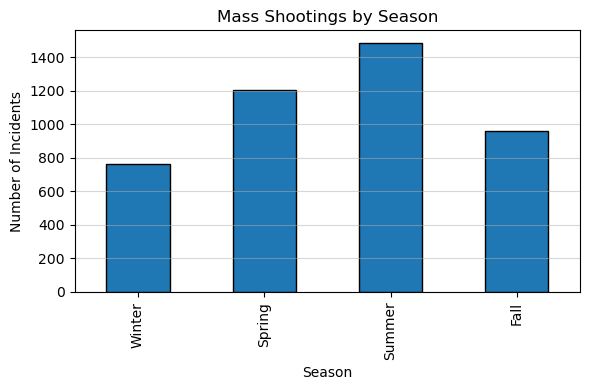

In [34]:
# Plot 4: Mass shootings per season
#Spring: March 1–May 31
#Summer: June 1–August 31
#Fall: September 1–November 30
#Winter: December 1–February 28/29

import pandas as pd

# Make sure 'Incident Date' is in datetime format
ms_data['Incident Date'] = pd.to_datetime(ms_data['Incident Date'], errors='coerce')

# Extract month and day
ms_data['Month'] = ms_data['Incident Date'].dt.month
ms_data['Day'] = ms_data['Incident Date'].dt.day

# Define a function to assign seasons
def get_season(row):
    month = row['Month']
    day = row['Day']
    
    if (month == 12 and day >= 21) or (month <= 3 and (month != 3 or day < 20)):
        return 'Winter'
    elif (month == 3 and day >= 20) or (month == 4) or (month == 5) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month == 7) or (month == 8) or (month == 9 and day < 23):
        return 'Summer'
    elif (month == 9 and day >= 23) or (month == 10) or (month == 11) or (month == 12 and day < 21):
        return 'Fall'
    else:
        return 'Unknown'

# Apply function to assign season
ms_data['Season'] = ms_data.apply(get_season, axis=1)

# Now you can group by season
season_counts = ms_data['Season'].value_counts()
print(season_counts)
print(sum(season_counts))

season_counts = ms_data['Season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

plt.figure(figsize=(6, 4))
season_counts.plot(kind='bar', edgecolor='black')
plt.title("Mass Shootings by Season")
plt.xlabel("Season")
plt.ylabel("Number of Incidents")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

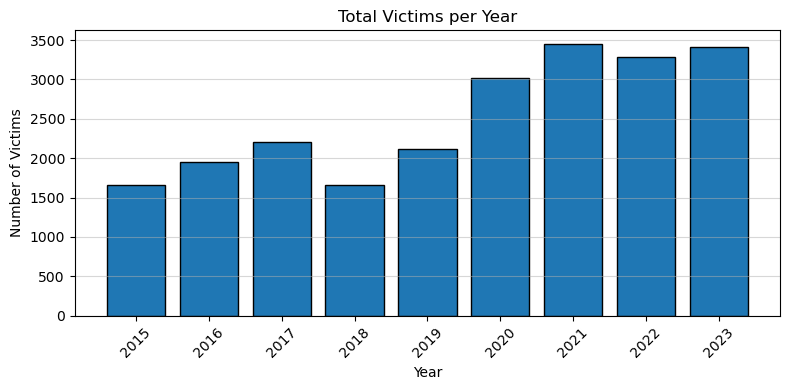

In [42]:
# Plot 5: Victims per year
# Total victims per row

# Create a DataFrame combining years and total victims
victims_df = pd.DataFrame({
    'Year': ms_year,
    'Total Victims': ms_total_vics
})

# Group by year and sum victims
victims_per_year = victims_df.groupby('Year')['Total Victims'].sum().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(victims_per_year.index, victims_per_year.values, edgecolor='black')
plt.title("Total Victims per Year")
plt.xlabel("Year")
plt.ylabel("Number of Victims")
plt.xticks(range(ms_year.min(), ms_year.max() + 1), rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

<Axes: xlabel='Month'>

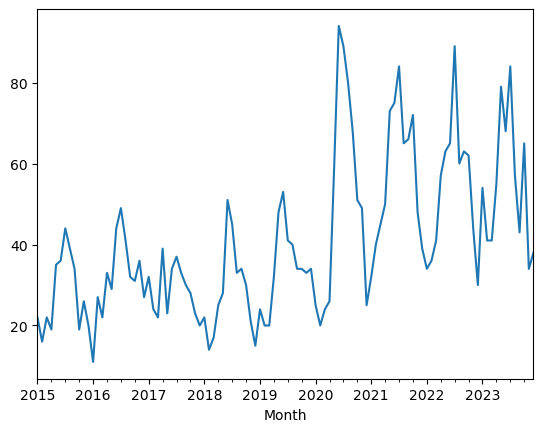

In [49]:
# Monthly trend of incidents
ms_data['Month'] = ms_data['Incident Date'].dt.to_period('M')
monthly_trend = ms_data.groupby('Month').size()

monthly_trend.plot.line()


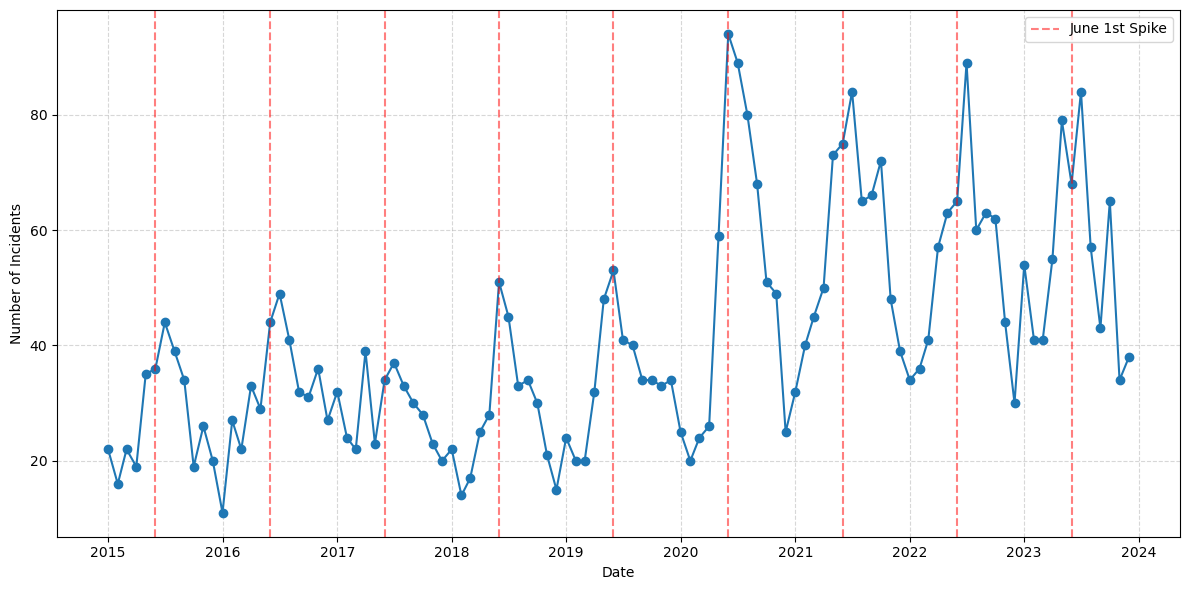

In [111]:
import matplotlib.pyplot as plt

# Ensure datetime format and extract monthly period
ms_data['Incident Date'] = pd.to_datetime(ms_data['Incident Date'], errors='coerce')
ms_data['Month'] = ms_data['Incident Date'].dt.to_period('M')

# Group by Month and count incidents
monthly_trend = ms_data.groupby('Month').size()

# Convert PeriodIndex to datetime for plotting
monthly_trend.index = monthly_trend.index.to_timestamp()

# Plot the monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o')

# Add vertical lines for each June — only label the first one
first = True
for date in monthly_trend.index:
    if date.month == 6:
        if first:
            plt.axvline(x=date, color='red', linestyle='--', alpha=0.5, label="June 1st Spike")
            first = False
        else:
            plt.axvline(x=date, color='red', linestyle='--', alpha=0.5)

#plt.title("Monthly Incident Trend with Junes Highlighted")
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()


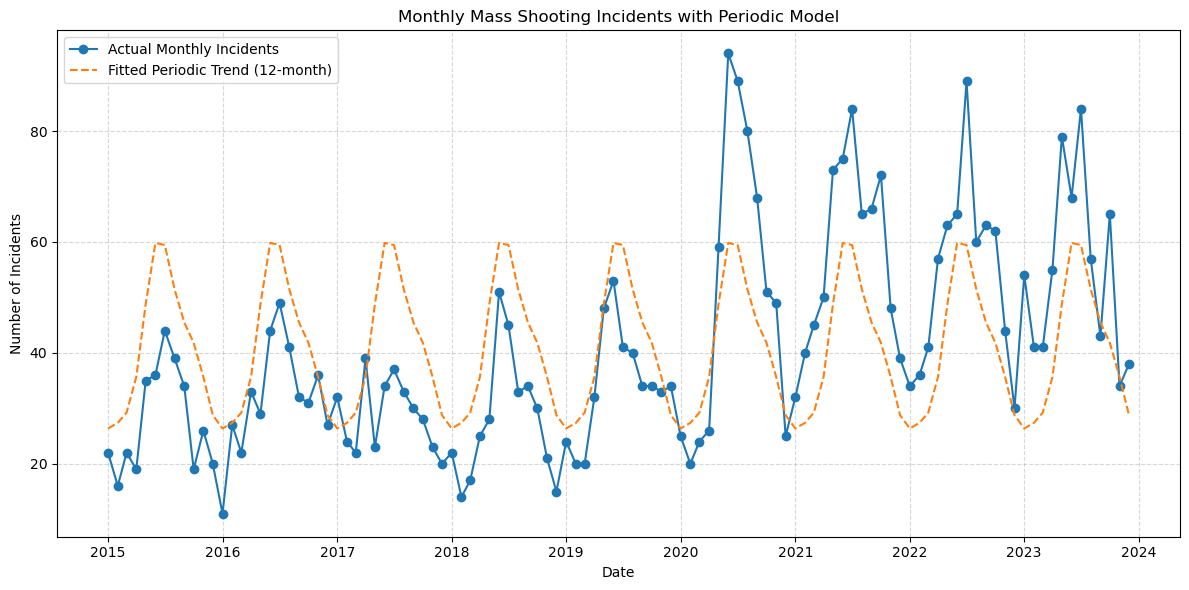

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Step 1: Process data ---

# Ensure 'Incident Date' is datetime
ms_data['Incident Date'] = pd.to_datetime(ms_data['Incident Date'], errors='coerce')

# Extract month (year + month only)
ms_data['Month'] = ms_data['Incident Date'].dt.to_period('M')

# Group by month and count number of incidents
monthly_trend = ms_data.groupby('Month').size()

# Convert PeriodIndex to datetime (first day of each month)
monthly_trend.index = monthly_trend.index.to_timestamp()

# --- Step 2: Create periodic features ---
# Time index: 0, 1, ..., N
t = np.arange(len(monthly_trend))
y = monthly_trend.values

# Add sin and cos components for 12-month cycle
X = np.column_stack([
    np.sin(2 * np.pi * t / 12),
    np.cos(2 * np.pi * t / 12),
    
    np.sin(4 * np.pi * t / 12),  # 2nd harmonic
    np.cos(4 * np.pi * t / 12),
    
    np.sin(6 * np.pi * t / 12),  # 3rd harmonic
    np.cos(6 * np.pi * t / 12),
])


# Fit linear regression model to sin/cos basis
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# --- Step 3: Plot ---
plt.figure(figsize=(12, 6))

# Actual data
plt.plot(monthly_trend.index, y, label="Actual Monthly Incidents", marker='o')

# Fitted periodic model
plt.plot(monthly_trend.index, y_pred, label="Fitted Periodic Trend (12-month)", linestyle='--')

"""
# Add vertical lines for every June
first = True
for date in monthly_trend.index:
    if date.month == 6:
        if first:
            plt.axvline(x=date, color='red', linestyle='--', alpha=0.5, label="June 1st Spike")
            first = False
        else:
            plt.axvline(x=date, color='red', linestyle='--', alpha=0.5)
"""

# Labels and formatting
plt.title("Monthly Mass Shooting Incidents with Periodic Model")
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
